# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [11]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt

Import `passengers.csv` and view the head.

In [12]:
# Read the dataset 'passengers.csv' and view the head
df = pd.read_csv('passengers.csv')
df.head()
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [13]:
# Set month column as a timeseries object, and make it the index
df.Month = pd.to_datetime(df.Month)
df.set_index('Month',inplace=True)

In [14]:
# check the head and the new index
print(df.head())
df.index
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

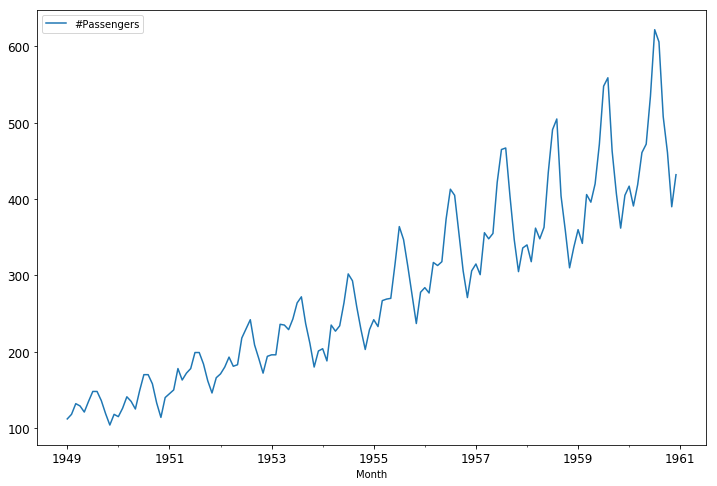

In [17]:
# Plot the time series data 
df.plot(figsize=(12,8), fontsize=12);

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [23]:
#Determine rolling statistics
rolling_m = df.rolling(12).mean()
rolling_std = df.rolling(12).std()

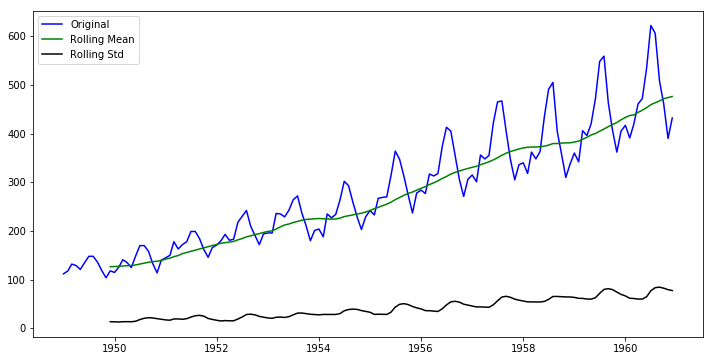

In [26]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(df, color='b', label='Original')
plt.plot(rolling_m,color='g',label='Rolling Mean')
plt.plot(rolling_std,color='k', label='Rolling Std')
plt.legend(loc='best')
plt.title=('Rolling Mean and Standard Deviation')
plt.show();

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [67]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
results_adf = adfuller(df['#Passengers'])
# Extract and display test results in a user friendly manner
def adf_disp(results_adf):
    df_results = pd.Series(results_adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in results_adf[4].items():
        df_results[f'Critical Value ({key})'] = value
    print(df_results)
adf_disp(results_adf)
# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Conclusion here

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [61]:
df_NYSE = pd.read_csv('NYSE_monthly.csv')
df_NYSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null object
monthly_return    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [62]:
df_NYSE.Month = pd.to_datetime(df_NYSE.Month)
df_NYSE.set_index('Month', inplace=True)
df_NYSE.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


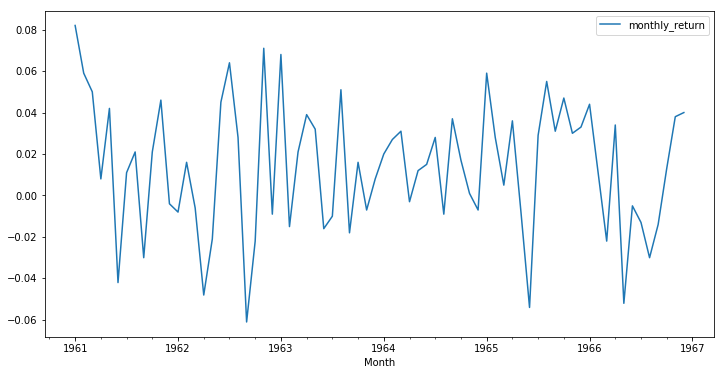

In [64]:
df_NYSE.plot(figsize=(12,6));

In [79]:
NYSE_rm = df_NYSE.rolling(12).mean()
NYSE_rstd = df_NYSE.rolling(12).std()

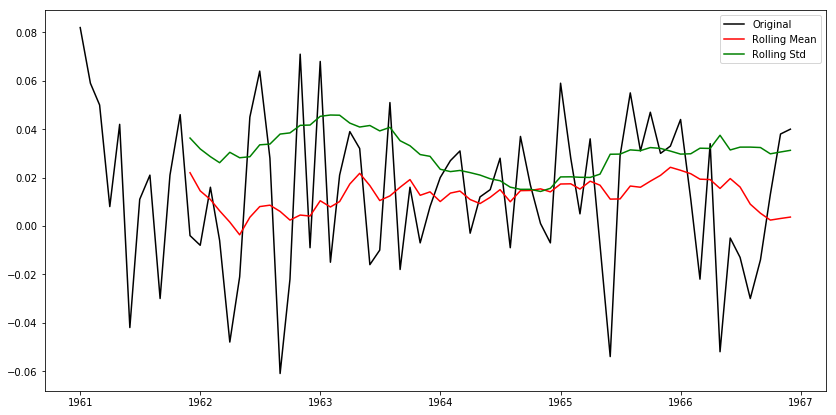

In [81]:
newfig = plt.figure(figsize=(14,7))
plt.plot(df_NYSE,color='k',label='Original')
plt.plot(NYSE_rm,color='r',label='Rolling Mean')
plt.plot(NYSE_rstd,color='g',label='Rolling Std')
plt.legend(loc='best')
plt.title=('Rolling Mean and Standard Deviation')
plt.show()

In [72]:
NYSE_adf = adfuller(df_NYSE['monthly_return'])
adf_disp(NYSE_adf)

Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!